# Тема “Обучение без учителя”
### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings('ignore')

In [2]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
# for line in boston.DESCR.split('\n'):
#     print(line)

In [3]:
X.shape, y.shape

((506, 13), (506,))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

scaler = StandardScaler()

In [6]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train))
X_test_sc = pd.DataFrame(scaler.fit_transform(X_test))

In [7]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=100)

X_train_tsne = tsne.fit_transform(X_train_sc)

print(f"До:\t{X_train_sc.shape}")
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


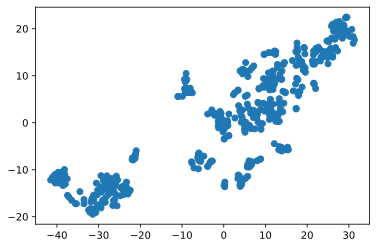

In [8]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


In [9]:
from sklearn.cluster import KMeans

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, max_iter=100, random_state=42)

In [10]:
labels_kmeans = kmeans.fit_predict(X_train)

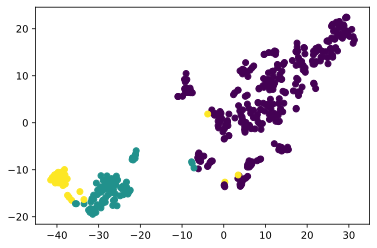

In [11]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_kmeans)

In [12]:
y_train[:10]

array([12. , 19.9, 19.4, 13.4, 18.2, 24.6, 21.1, 24.7,  8.7, 27.5])

In [13]:
for i in range(n_clusters):
    print(f"Кластер {i}: {X_train.loc[labels_kmeans == i, 'CRIM'].mean()}")

Кластер 0: 0.40486282828282827
Кластер 1: 11.745661842105262
Кластер 2: 14.360380322580646


In [14]:
for i in range(n_clusters):
    print('Кластер ' + str(i) +': {}'.format(y_train[labels_kmeans == i].mean()))

Кластер 0: 25.16868686868687
Кластер 1: 17.442105263157895
Кластер 2: 13.196774193548388


### *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [15]:
labels_test = kmeans.predict(X_test)
labels_test

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 2, 2, 0, 0], dtype=int32)

In [16]:
for i in range(n_clusters):
    print(f"Кластер {i}: {X_test.loc[labels_test == i, 'CRIM'].mean()}")


Кластер 0: 0.24642115942028991
Кластер 1: 8.469301923076923
Кластер 2: 19.021665714285714


In [17]:
for i in range(n_clusters):
    print(f"Кластер {i}: {y_test[labels_test == i].mean()}")

Кластер 0: 23.91159420289855
Кластер 1: 17.392307692307693
Кластер 2: 12.814285714285713
